In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns


from wordcloud import WordCloud

In [12]:
df=pd.read_csv('USvideos.csv')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [13]:
df.shape

(40949, 16)

In [14]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]


In [15]:
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
pl.rc('figure', figsize=(8, 5), dpi=100)
pl.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
pl.rc('patch', linewidth=0)
pl.rc('xtick.major', width=0.2)
pl.rc('ytick.major', width=0.2)
pl.rc('grid', color='#9E9E9E', linewidth=0.4)
pl.rc('font', family='Arial', weight='400', size=10)
pl.rc('text', color='#282828')
pl.rc('savefig', pad_inches=0.3, dpi=300)

In [16]:
df["description"] = df["description"].fillna(value="")

In [17]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80
std,7.57,7394113.76,228885.34,29029.71,37430.49
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00
50%,24.00,681861.00,18091.00,631.00,1856.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


In [18]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False

In [20]:
df['Contains_Capital']=df['title'].apply(lambda x: contains_capitalized_word(x))
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Contains_Capital
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,True
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",True


In [33]:
value_counts=df['Contains_Capital'].value_counts()

value_counts

False    22949
True     18000
Name: Contains_Capital, dtype: int64

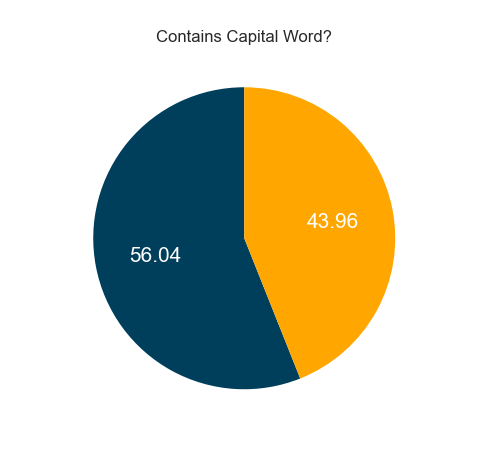

In [55]:
pl.title('Contains Capital Word?')
pl.pie(x=value_counts.values,labels=value_counts.keys(),startangle=90,
      autopct="%.2f",colors=['#003f5c', '#ffa600'],
      textprops={'color': '#FFF',
                'size':15})
pl.show()

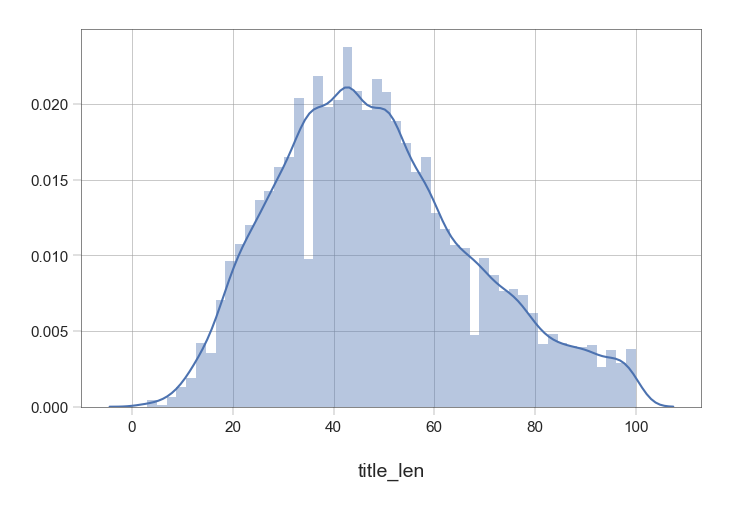

In [57]:
df['title_len']=df['title'].apply(lambda x: len(x))
sns.distplot(df['title_len'])
pl.show()

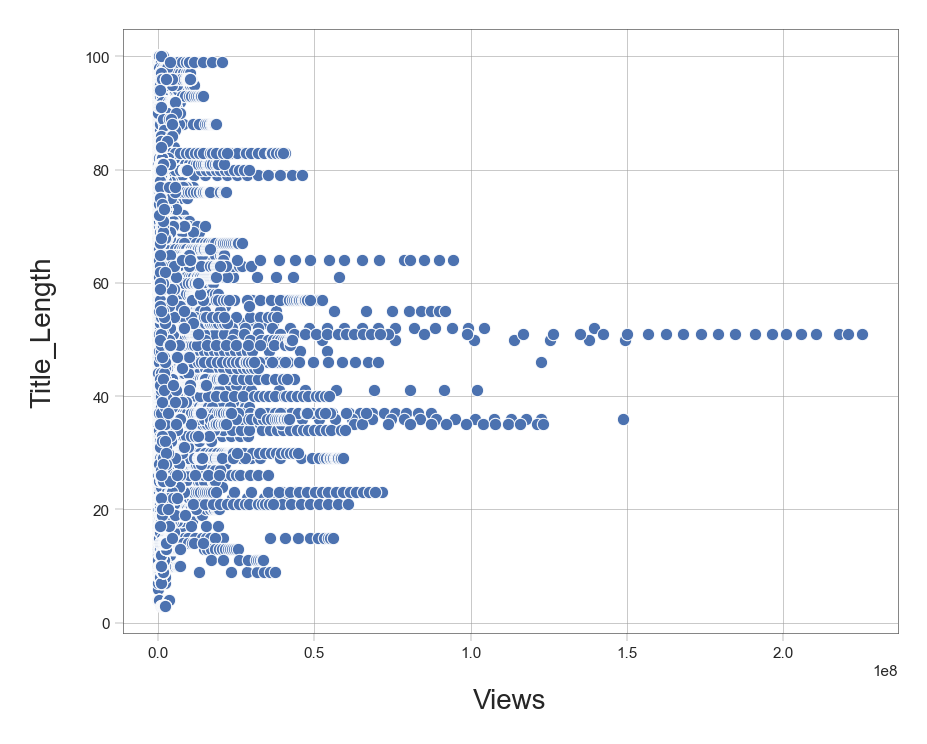

In [78]:
pl.figure(figsize=(10,8))
sns.scatterplot(y=df['title_len'],x=df['views'],markers='o',s=80)
pl.ylabel("Title_Length",fontsize=20)
pl.xlabel("Views",fontsize=20)
pl.show()

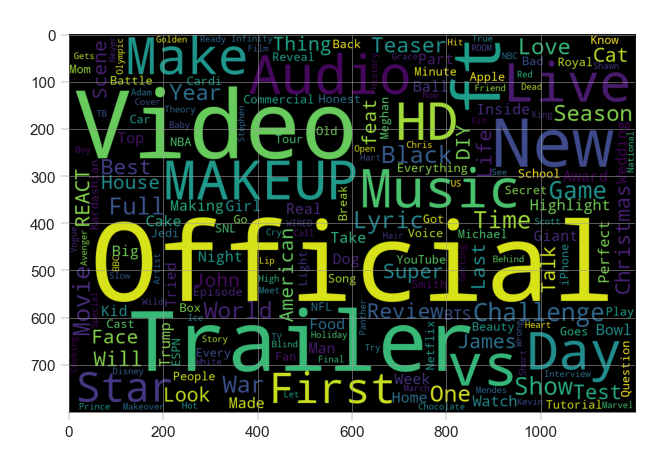

In [102]:
title_words=' '.join(list(df['title']))
img=WordCloud(width=1200,height=800,
              background_color='black',
              collocations=False
             ).generate(title_words)
pl.imshow(img)